<a href="https://colab.research.google.com/github/Sriramkrishna-Deshpande/ML-Projects/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

**Import all nessary Libraries **

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# To display multiple outputs in the same cell
from IPython.display import display


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

Load the Wine Quality Dataset

In [6]:
# Load dataset with the correct delimiter (semicolon)
# Use the data loaded in the previous cell
df = pd.concat([X, y], axis=1)

# Check the first few rows
print(df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
# Verify that the 'quality' column exists after cleaning
print('quality' in df.columns)  # Should return True if the 'quality' column exists


True


Data Processing

In [8]:
# Checking for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

# Separate features (X) and target (y)
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable (quality of wine)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (optional but helps in models like SVM, KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dio

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.21      0.21        43
           5       0.60      0.68      0.64       402
           6       0.67      0.59      0.63       597
           7       0.54      0.58      0.56       215
           8       0.33      0.36      0.35        36
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.34      0.35      0.34      1300
weighted avg       0.60      0.59      0.59      1300

Random Forest Accuracy: 0.6692307692307692
[[  0   0   2   4   0   0   0]
 [  1   5  23  14   0   0   0]
 [  0   1 286 111   4   0   0]
 [  0   1 111 449  36   0   0]
 [  0   0   3  93 118   1   0]
 [  0   0   0  14  10  12   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

SVM Accuracy: 0.56
[[  0   0   1   5   0   0   0]
 [  1   0  28  14   0   0   0]
 [  0   0 263 138   1   0   0]
 [  0   0 157 422  18   0   0]
 [  0   0   5 167  43   0   0]
 [  0   0   0  27   9   0   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.58      0.65      0.61       402
           6       0.55      0.71      0.62       597
           7       0.61      0.20      0.30       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.25      0.22      0.22      1300
weighted avg       0.53      0.56      0.52      1300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


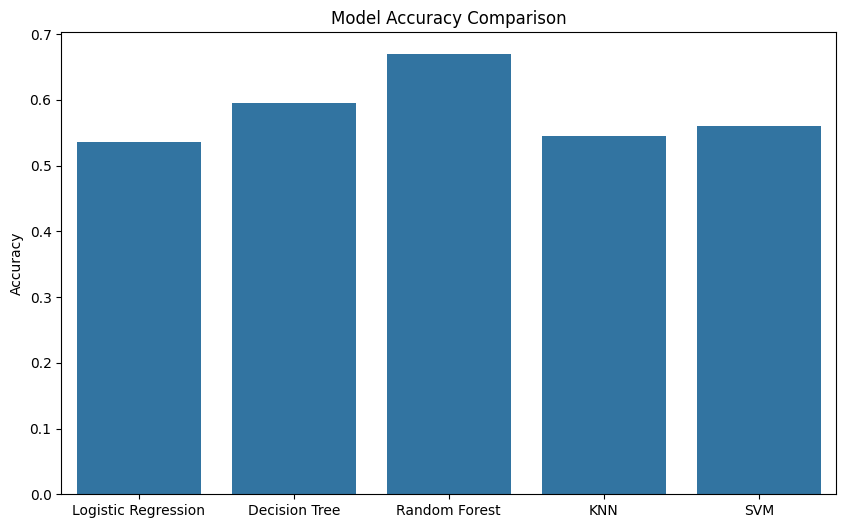

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset with the correct delimiter (semicolon)
df = pd.concat([X, y], axis=1)

# Clean column names (strip quotes and spaces)
df.columns = df.columns.str.replace('"', '').str.strip()

# Check the first few rows and column names to confirm
print(df.head())
print(df.columns)

# Separate features (X) and target (y)
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable (quality of wine)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (optional but helps in models like SVM, KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# SVM model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Plot the accuracies of different models
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm)
]

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


Final test

Training data shape: (1299, 11)
Testing data shape: (4548, 11)
Surplus data shape: (650, 11)
Logistic Regression Confusion Matrix:
[[   1    1   10    7    0    0    0]
 [   1    4   86   49    1    0    0]
 [   0    7  919  571    6    0    0]
 [   0    1  496 1402   84    0    0]
 [   0    0   36  591  129    0    0]
 [   0    0    4  101   36    0    0]
 [   0    0    0    1    4    0    0]]

Decision Tree Confusion Matrix:
[[   0    0   12    6    1    0    0]
 [   4   14   67   44    9    3    0]
 [   4   69  847  451  119   13    0]
 [   1   51  512 1054  319   46    0]
 [   2   13   58  334  308   41    0]
 [   0    1    3   61   46   30    0]
 [   0    0    1    1    2    1    0]]

Random Forest Confusion Matrix:
[[   0    0   12    7    0    0    0]
 [   1    8   85   43    4    0    0]
 [   0    3 1007  478   14    1    0]
 [   0    1  514 1349  116    3    0]
 [   0    0   20  481  251    4    0]
 [   0    0    0   74   47   20    0]
 [   0    0    0    3    2    0    0]]

K

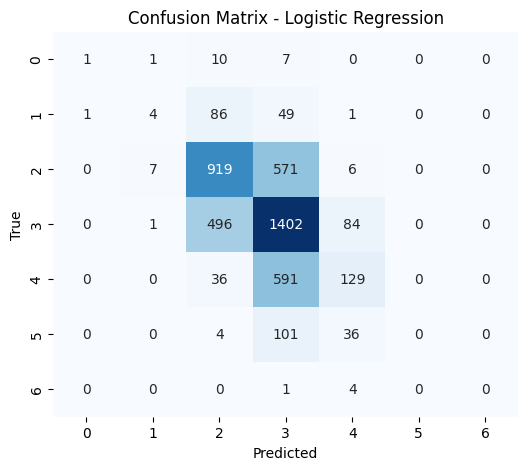

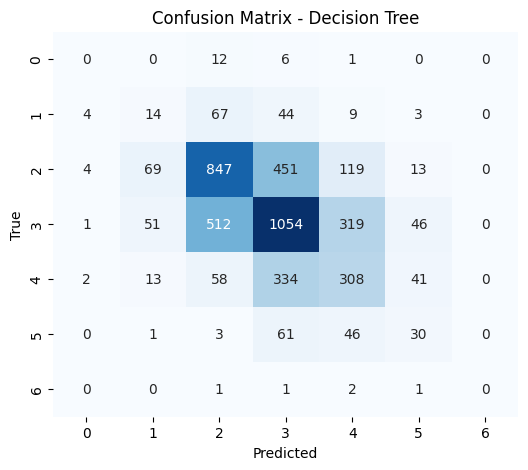

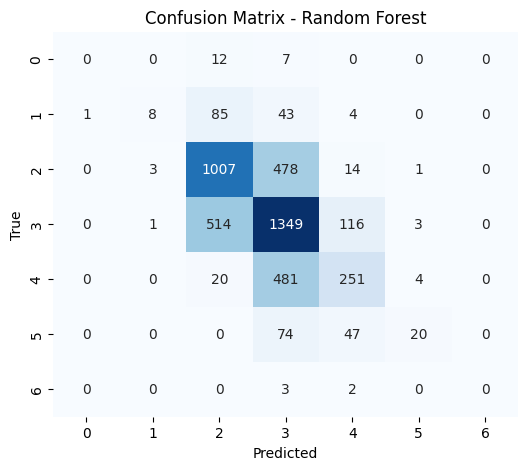

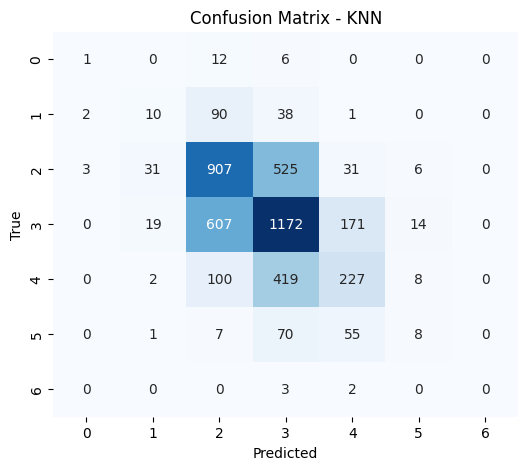

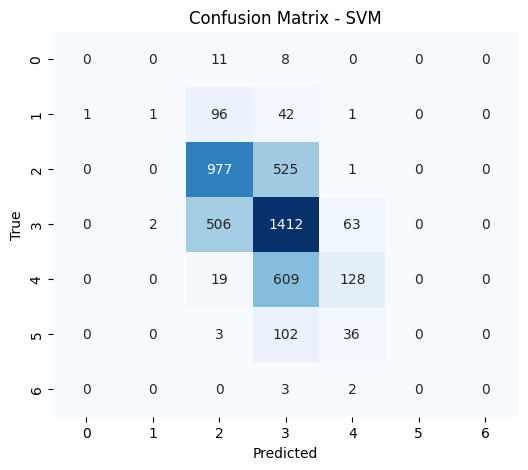

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset with the correct delimiter (semicolon)
df = pd.concat([X, y], axis=1)

# Clean column names (strip quotes and spaces)
df.columns = df.columns.str.replace('"', '').str.strip()

# Separate features (X) and target (y)
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable (quality of wine)

# Step 1: Split the dataset into 20% training, 70% testing, and 10% surplus
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.80, random_state=42)  # 80% goes into temp (70% testing + 10% surplus)
X_test, X_surplus, y_test, y_surplus = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 10% for surplus, 70% for testing

# Step 2: Normalize the data
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the surplus test data (this will prevent data leakage)
scaler.fit(X_surplus)

# Normalize all datasets using the same scaler (to prevent bias)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_surplus_scaled = scaler.transform(X_surplus)

# Check the shapes of the splits to ensure everything is correct
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")
print(f"Surplus data shape: {X_surplus_scaled.shape}")

# Step 3: Train and Test Various Models

# Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print(f"Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print(f"\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(f"\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print(f"\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# SVM model
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print(f"\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Optional: Plotting the confusion matrices for each model
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), 'Logistic Regression')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt), 'Decision Tree')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), 'Random Forest')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), 'KNN')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), 'SVM')
